# [실습-정답] Python을 활용한 AI 모델링 - 머신러닝 파트
+ 이번시간에는 Python을 활용한 AI 모델링에서 머신러닝에 대해 실습해 보겠습니다.
+ 머신러닝 모델에는 아래와 같이 모델들이 있습니다.
 + 단일 분류예측 모델 : LogisticRegression, KNN, DecisionTree
 + 앙상블(Ensemble) 모델 : RandomForest, XGBoost, LGBM, Stacking, Weighted Blending
+ 솔직히, 머신러닝이 딥러닝보다 코딩하기 쉽습니다. 4줄 템플릿에 맞쳐 코딩하면 되기 때문입니다.
+ 한가지 당부 드리고 싶은 말은 "백문이불여일타" 입니다.
+ 이론보다 실습이 더 많은 시간과 노력이 투자 되어야 합니다.

## 학습목차
1. 실습준비
2. 머신러닝 모델 프로세스
 - 데이터 가져오기
 - 데이터 전처리
 - Train, Test 데이터셋 분할
 - 데이터 정규화
 - 단일 분류예측 모델 : LogisticRegression, KNN, DecisionTree
 - 앙상블(Ensemble) 모델 : RandomForest, XGBoost, LGBM, Stacking, Weighted Blending


# 1. 실습준비

In [ ]:
# 코드실행시 경고 메시지 무시

import warnings
warnings.filterwarnings(action='ignore')

# 2. 머신러닝 모델 프로세스
① 라이브러리 임포트(import)
② 데이터 가져오기(Loading the data)
③ 탐색적 데이터 분석(Exploratory Data Analysis)
④ 데이터 전처리(Data PreProcessing) : 데이터타입 변환, Null 데이터 처리, 누락데이터 처리,
더미특성 생성, 특성 추출 (feature engineering) 등
⑤ Train, Test  데이터셋 분할
⑥ 데이터 정규화(Normalizing the Data)
⑦ 모델 개발(Creating the Model)
⑧ 모델 성능 평가

## ① 라이브러리 임포트

##### 필요 라이브러리 임포트

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## ② 데이터 로드

#### cust_data.csv 파일 컬럼명
+ 고객등급(class), 성별(sex), 나이(age), 사용서비스수(service), 서비스중지여부 (stop), 미납여부(npay)
+ 3개월 평균 요금(avg_bill), A서비스 3개월 평균요금(A_bill), B서비스 3개월 평균요금(B_bill), 해지여부(termination)

In [ ]:
from impala.dbapi import connect
import pandas as pd

# Step 1: Impala 연결 설정
conn = connect(
    host='apramn102.hyundaicapital.com',  # Hue에서 사용하는 Impala 호스트 주소
    port=21053,               # Impala 기본 포트
    auth_mechanism='GSSAPI'   # 사용할 데이터베이스 이름
)

# Step 2: SQL 쿼리 실행 및 DataFrame으로 변환
query = "SELECT * FROM hcs_t_bdpedu_l2a.cust;"
df = pd.read_sql(query, conn)

# Step 3: 데이터프레임 확인
print(df)

# Step 4: 연결 닫기
conn.close()

## ③ 데이터 분석

In [ ]:
# 10컬럼, 9930 라인
df.info()

In [ ]:
df.tail()

In [ ]:
df['termination'].values

In [ ]:
# termination 레이블 불균형
df['termination'].value_counts().plot(kind='bar')

## ④ 데이터 전처리

+ Object 컬럼에 대해 Pandas get_dummies 함수 활용하여 One-Hot-Encoding

In [ ]:
# Object 컬럼 리스트 정의
#cal_cols =['class', 'sex', 'stop', 'npay', 'termination', 'bill_rating']
cal_cols = df.select_dtypes(include='object').columns
cal_cols

In [ ]:
# pandas get_dummies 함수 사용하여 Object 컬럼에 대해 One-Hot-Encoding 수행
df1 = pd.get_dummies(data=df, columns=cal_cols, drop_first=True)

In [ ]:
df['sex'].values

In [ ]:
# 19컬럼, 7814 라인
df1.info()

In [ ]:
df1.head()

## ⑤ Train, Test  데이터셋 분할

#### 입력(X)과 레이블(y) 나누기

##### <font color=blue> **[문제] df1 DataFrame에서 'termination_Y' 컬럼을 제외한 나머지 정보를 X에 저장하세요.** </font>

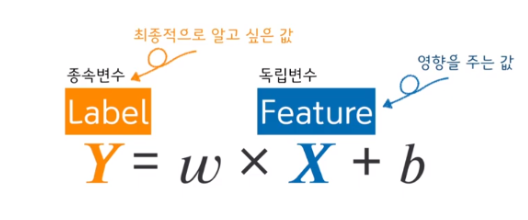

In [ ]:
# DataFrame drop 함수 활용
# 'termination_Y' 컬럼 삭제
# DataFrame에서 values만 X에 저장


X = df1.drop('termination_Y', axis=1).values
X

##### <font color=blue> **[문제] df1 DataFrame에서 'termination_Y' 컬럼의 값을 y로 저장하세요.** </font>

In [ ]:
y = df1['termination_Y'].values
y

In [ ]:
X.shape, y.shape

#### Train , Test dataset 나누기

In [ ]:
from sklearn.model_selection import train_test_split

##### <font color=blue> **[문제] Train dataset, Test dataset 나누세요.** </font>

In [ ]:
# Train dataset, Test dataset 나누기 : train_test_split 함수 사용
# 입력 : X, y
# Train : Test 비율 = 7: 3  --> test_size=0.3
# y Class 비율에 맞게 나주어 주세요 : stratify=y
# 여러번 수행해도 같은 결과 나오게 고정하기 : random_state=42
# 결과 : X_train, X_test, y_train, y_test


X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    stratify=y,
                                                    random_state=42)

In [ ]:
X_train.shape

In [ ]:
y_train.shape

## ⑥ 데이터 정규화/스케일링(Normalizing/Scaling)

In [ ]:
# 숫자 분포 이루어진 컬럼 확인
df1.tail()

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

##### <font color=blue> **[문제] MinMaxScaler 함수를 'scaler'로 정의 하세요.** </font>

In [ ]:
# 사이키런의 MinMaxScaler() 함수 활용
# 정의할 결과를 'scaler'로 매핑

scaler = MinMaxScaler()

In [ ]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

+ 모델 입력갯수, 출력갯수 확인

In [ ]:
X_train[:2], y_train[:2]

## ⑦ 모델 개발


### 1) 로지스틱 회귀 (LogisticRegression, 분류)

parameter 소개
* C : regularization strength의 역수로써 작으면 작을수록 가중치에 더 강한 regularization이 적용
* max_iter :  최적화 방식을 몇번 수행할것인지 정해주는 것

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report

##### <font color=blue> **[문제] LogisticRegression 모델 정의하고 학습시키세요.** </font>

In [ ]:
# LogisticRegression 함수 사용 및 정의 : lg 저장
# 정의된 LogisticRegression 학습 fit() : 입력값으로 X_train, y_train 준다.


lg = LogisticRegression()
lg.fit(X_train, y_train)

In [ ]:
# 분류기 성능 평가(score)
#score는 accuracy / r-squared 를 반영하여 점수냄
lg.score(X_test, y_test)

###분류기 성능 평가 지표

- accuracy_score: 모델이 정답을 맞춘것의 비율
- precision_score: 모델이 True로 예측한 데이터중 실제로 True인 데이터
- recall_score: 실제로 True인 데이터를 모델이 True라고 인식한 데이터의 비율
- f1 score: 정밀도 + 재현율

In [ ]:
lg_pred = lg.predict(X_test)

In [ ]:
# 오차행렬
# TN  FP
# FN  TP

confusion_matrix(y_test, lg_pred)

In [ ]:
# 정확도 : 굉장히 높다
accuracy_score(y_test, lg_pred)

In [ ]:
# 정밀도
precision_score(y_test, lg_pred)

In [ ]:
# 재현율 : 굉장히 낮다.
recall_score(y_test, lg_pred)

In [ ]:
# 정밀도 + 재현율
f1_score(y_test, lg_pred)

In [ ]:
# 'True'는 모델이 올바르게 예측한 경우를 의미
# 'False'는 모델의 예측이 잘못된 경우를 의미
# Weighted Average는 각 클래스의 샘플 수를 고려하여 평균 점수를 계산하는 방식
# Macro Average는 모든 클래스를 동등하게 취급하여 전체 클래스에 걸쳐 평균 성능을 계산하는 방식
print(classification_report(y_test, lg_pred))

In [ ]:
accuracy_score(y_test,lg_pred)

  ### 2) KNN (K-Nearest Neighbor)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

In [ ]:
knn_pred = knn.predict(X_test)

In [ ]:
recall_score(y_test, knn_pred)

In [ ]:
#정밀도를 구하시오

In [ ]:
accuracy_score(y_test,knn_pred)

### 3) 결정트리(DecisionTree)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dt = DecisionTreeClassifier(max_depth=10, random_state=42)
dt.fit(X_train, y_train)

##### <font color=blue> **[문제] 학습된 DecisionTreeClassifier 모델로 예측해 보기** </font>

In [ ]:
# DecisionTreeClassifier 학습 모델 : dt
# DecisionTreeClassifier 모델의 predict() 활용 : 입력값으로 X_test
# 결과 : dt_pred 저장

dt_pred = dt.predict(X_test)

In [ ]:
accuracy_score(y_test,dt_pred)

### **앙상블 기법의 종류**
- 배깅 (Bagging): 여러개의 DecisionTree 활용하고 샘플 중복 생성을 통해 결과 도출. RandomForest
- 부스팅 (Boosting): 약한 학습기를 순차적으로 학습을 하되, 이전 학습에 대하여 잘못 예측된 데이터에 가중치를 부여해 오차를 보완해 나가는 방식. XGBoost, LGBM
- 스태킹 (Stacking): 여러 모델을 기반으로 예측된 결과를 통해 Final 학습기(meta 모델)이 다시 한번 예측

### 4) 랜덤포레스트(RandomForest)
+ Bagging 대표적인 모델로써, 훈련셋트를 무작위로 각기 다른 서브셋으로 데이터셋을 만들고
+ 여러개의 DecisonTree로 학습하고 다수결로 결정하는 모델

**주요 Hyperparameter**
- random_state: 랜덤 시드 고정 값. 고정해두고 튜닝할 것!
- n_jobs: CPU 사용 갯수
- max_depth: 깊어질 수 있는 최대 깊이. 과대적합 방지용
- n_estimators: 앙상블하는 트리의 갯수
- max_features: 최대로 사용할 feature의 갯수. 과대적합 방지용
- min_samples_split: 트리가 분할할 때 최소 샘플의 갯수. default=2. 과대적합 방지용

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rfc = RandomForestClassifier(n_estimators=3, random_state=42)
rfc.fit(X_train, y_train)

In [ ]:
rfc_pred = rfc.predict(X_test)

In [ ]:
accuracy_score(y_test,rfc_pred)

### 5) Light GBM
+ XGBoost와 함께 주목받는 DecisionTree 알고리즘 기반의 Boosting 앙상블 기법
+ XGBoost에 비해 학습시간이 짧은 편이다.

**주요 특징**
- scikit-learn 패키지가 아닙니다.
- 성능이 우수함
- 속도도 매우 빠릅니다.

**주요 Hyperparameter**
- random_state: 랜덤 시드 고정 값. 고정해두고 튜닝할 것!
- n_jobs: CPU 사용 갯수
- learning_rate: 학습율. 너무 큰 학습율은 성능을 떨어뜨리고, 너무 작은 학습율은 학습이 느리다. 적절한 값을 찾아야함. n_estimators와 같이 튜닝. default=0.1
- n_estimators: 부스팅 스테이지 수. (랜덤포레스트 트리의 갯수 설정과 비슷한 개념). default=100
- max_depth: 트리의 깊이. 과대적합 방지용. default=3.
- colsample_bytree: 샘플 사용 비율 (max_features와 비슷한 개념). 과대적합 방지용. default=1.0

In [ ]:
!pip install lightgbm

In [ ]:
from lightgbm import LGBMClassifier

In [ ]:
lgbm = LGBMClassifier(n_estimators=3, random_state=42)
lgbm.fit(X_train, y_train)

In [ ]:
lgbm_pred = lgbm.predict(X_test)

In [ ]:
accuracy_score(y_test,lgbm_pred)

### 6) Stacking

개별 모델이 예측한 데이터를 기반으로 **final_estimator** 종합하여 예측을 수행합니다.
- 성능을 극으로 끌어올릴 때 활용하기도 합니다.
- 과대적합을 유발할 수 있습니다. (특히, 데이터셋이 적은 경우)

In [ ]:
from sklearn.ensemble import StackingRegressor, StackingClassifier

In [ ]:
stack_models = [
    ('LogisticRegression', lg),
    ('KNN', knn),
    ('DecisionTree', dt),
]

In [ ]:
# stack_models로 선언된 모델(LogisticRegression,KNN,DecisionTree)의 예측결과를 최종 meta_model(final_estimator)을 RandomForest(rfc) 사용하여 분류 예측
stacking = StackingClassifier(stack_models, final_estimator=rfc, n_jobs=-1)

In [ ]:
stacking.fit(X_train, y_train)   # 1분 20초 소요

In [ ]:
stacking_pred = stacking.predict(X_test)

In [ ]:
accuracy_score(y_test,stacking_pred)

### 7) Weighted Blending

각 모델의 예측값에 대하여 weight를 곱하여 최종 output 계산
- 모델에 대한 가중치를 조절하여, 최종 output을 산출합니다.
- **가중치의 합은 1.0**이 되도록 합니다.

In [ ]:
final_outputs = {
    'DecisionTree': dt_pred,
    'randomforest': rfc_pred,
    'xgb': xgb_pred,
    'lgbm': lgbm_pred,
    'stacking': stacking_pred,
}

In [ ]:
final_prediction = (
    final_outputs['DecisionTree'].astype(int) * 0.1
    + final_outputs['randomforest'].astype(int) * 0.2
    + final_outputs['xgb'].astype(int) * 0.25
    + final_outputs['lgbm'].astype(int) * 0.15
    + final_outputs['stacking'].astype(int) * 0.3
)

In [ ]:
# 가중치 계산값이 0.5 초과하면 1, 그렇지 않으면 0
final_prediction = np.where(final_prediction > 0.5, 1, 0)

In [ ]:
accuracy_score(y_test,final_prediction)

## 배운 내용 정리
1. 머신러닝 모델 프로세스 <br>
① 라이브러리 임포트(import)  
② 데이터 가져오기(Loading the data)  
③ 탐색적 데이터 분석(Exploratory Data Analysis)  
④ 데이터 전처리(Data PreProcessing) : 데이터타입 변환, Null 데이터 처리, 누락데이터 처리,
더미특성 생성, 특성 추출 (feature engineering) 등  
⑤ Train, Test  데이터셋 분할  
⑥ 데이터 정규화(Normalizing the Data)  
⑦ 모델 개발(Creating the Model)  
⑧ 모델 성능 평가
2. 평가 지표 활용 : 모델별 성능 확인을 위한 함수 (가져다 쓰면 된다)
3. 단일 회귀예측 모델 : LogisticRegression, KNN, DecisionTree
4. 앙상블 (Ensemble) : RandomForest, XGBoost, LGBM, Stacking, Weighted Blending